In [23]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Collect all data from the **data** folder into one DataFrame

In [43]:
df = pd.DataFrame()  # Create an empty DataFrame

for (root, dirs, files) in os.walk('4_data'):
    # Iterate over the directory tree rooted at '4_data'
    # At each iteration, os.walk() returns a tuple containing:
    # - root: the current directory path
    # - dirs: a list of subdirectories in the current directory
    # - files: a list of files in the current directory
    
    if files:  # Check if the current directory contains any files
        date, name = root.split('\\')[2:4]  # Extract 'date' and 'name' from the directory path
        df_1 = pd.read_csv(os.path.join('C:\\Users\\i.trigub\\Python\\', root, files), index_col=0)  # Read the first CSV file in the directory into a DataFrame
        df_1['name'] = name  # Add a new column 'name' with the extracted name
        df_1['date'] = date  # Add a new column 'date' with the extracted date
        df = pd.concat([df, df_1], ignore_index=True)  # Append the DataFrame to the main DataFrame, resetting the index


In [3]:
df.head(10)

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
5,94,4,Alexey_Smirnov,2020-12-03
6,56,5,Anton_Petrov,2020-12-03
7,27,3,Anton_Petrov,2020-12-03
8,82,1,Anton_Petrov,2020-12-03
9,61,1,Anton_Petrov,2020-12-03


Let’s look at the total amount of goods

In [4]:
df.quantity.sum()

480

Find out which user bought the most goods

In [13]:
quantity_bought = df.groupby('name').quantity.sum()

In [16]:
max_quantity = quantity_bought.max()
max_bought

52

In [17]:
quantity_bought.loc[quantity_bought == max_quantity].index

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

Find the top 10 products by the number of units sold over all time and create a bar plot.

In [18]:
products_sold = df.groupby('product_id', as_index = False).quantity.sum()

In [19]:
products_sold.head()

,product_id,quantity
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10


In [20]:
products_sold = products_sold.sort_values('quantity', ascending = False).head(10)

Text(0.5, 1.0, 'Top 10 most purchased products')

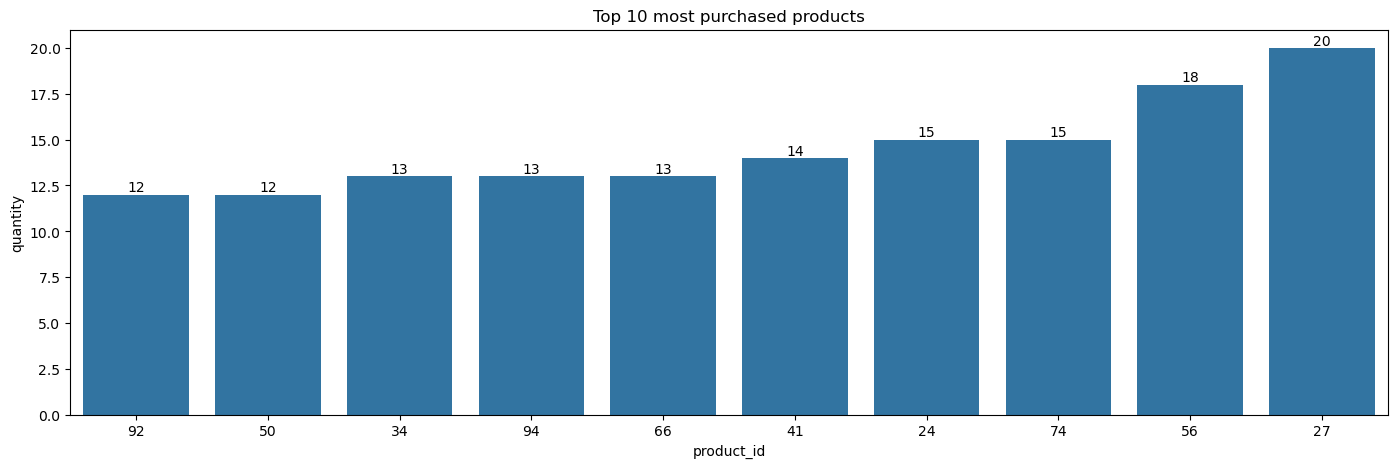

In [29]:
fig, ax = plt.subplots(figsize = (17,5))
sns.barplot(data = products_sold, x = 'product_id', y = 'quantity',
            order = products_sold.sort_values('quantity').product_id, ax=ax)

ax.bar_label(ax.containers[0])

ax.set_title('Top 10 most purchased products')

Let’s look at the sales by day

In [33]:
products_per_day = df.groupby('date', as_index = False).quantity.sum()

Text(0.5, 1.0, 'Purchases by day')

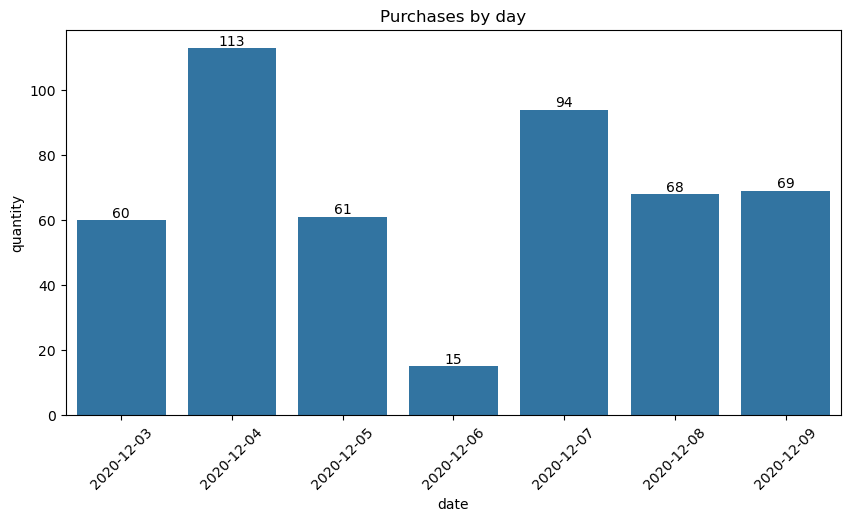

In [37]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.barplot(data = products_per_day, x = 'date', y = 'quantity',
            order = products_per_day.date, ax=ax)

ax.bar_label(ax.containers[0])

ax.tick_params(axis = 'x', rotation = 45)
ax.set_title('Purchases by day')

How many users have purchased any product more than once?

In [40]:
same_product = df.groupby(['name', 'product_id']).date.nunique().sort_values(ascending = False)
same_product

name            product_id
Anton_Ivanov    15            2
Petr_Fedorov    94            2
Alexey_Fedorov  13            1
Petr_Smirnov    21            1
Petr_Petrov     64            1
                             ..
Anton_Smirnov   28            1
                33            1
                34            1
                40            1
Vasiliy_Petrov  78            1
Name: date, Length: 158, dtype: int64

In [42]:
same_product.loc[same_product > 1]

name          product_id
Anton_Ivanov  15            2
Petr_Fedorov  94            2
Name: date, dtype: int64